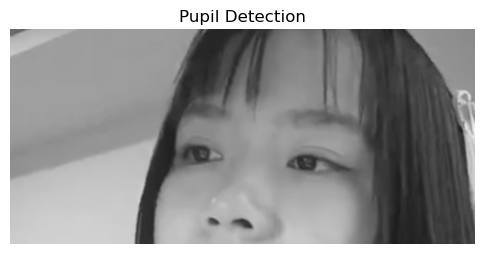

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the eye image
eye_img = cv2.imread("image.png", cv2.IMREAD_GRAYSCALE)

# Apply GaussianBlur to remove noise
blurred_eye = cv2.GaussianBlur(eye_img, (9, 9), 2)

# Use adaptive thresholding to enhance contrast
_, thresh_eye = cv2.threshold(blurred_eye, 50, 255, cv2.THRESH_BINARY_INV)

# Apply morphological operations to clean small noise
kernel = np.ones((3,3), np.uint8)
thresh_eye = cv2.morphologyEx(thresh_eye, cv2.MORPH_CLOSE, kernel)

# Detect pupils using Hough Circle Transform
circles = cv2.HoughCircles(
    thresh_eye,
    cv2.HOUGH_GRADIENT,
    dp=1.5, minDist=30,
    param1=100, param2=30,  # Lower param2 for better small-circle detection
    minRadius=5, maxRadius=50
)

# Convert image to color for visualization
eye_with_circles = cv2.cvtColor(eye_img, cv2.COLOR_GRAY2BGR)

# Draw detected pupil(s)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(eye_with_circles, (i[0], i[1]), i[2], (0, 255, 0), 2)  # Circle around pupil
        cv2.circle(eye_with_circles, (i[0], i[1]), 2, (0, 0, 255), 3)    # Center point

# Display result
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(eye_with_circles, cv2.COLOR_BGR2RGB))
plt.title("Pupil Detection")
plt.axis("off")
plt.show()
